### Analyze australia wildfire and visualize the analysis

In [12]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [25]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [15]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [26]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [27]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [28]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

df

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N,2020,10
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,2020,10
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,2020,10
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,2020,10


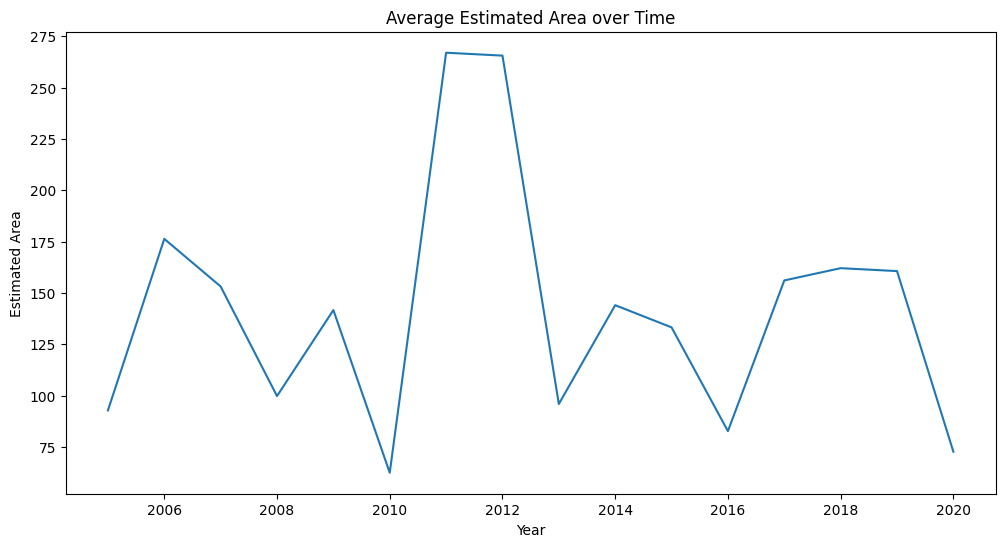

In [30]:
# average estimated fire area over time using pandas to plot
plt.figure(figsize=(12, 6))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.title('Average Estimated Area over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Area')
plt.show()

In [19]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Load the dataset
file_path = 'australia_wildfire_data.csv'  # Replace with the actual file path
wildfire_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(wildfire_data.head())

# Basic statistics of the dataset
print(wildfire_data.describe())

# Check for missing values
print(wildfire_data.isnull().sum())

# Visualize the distribution of wildfire occurrences by year
plt.figure(figsize=(10, 6))
sns.countplot(data=wildfire_data, x='Year', palette='viridis')
plt.title('Wildfire Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between temperature and wildfire occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wildfire_data, x='Temperature', y='Wildfire_Count', hue='Region', palette='coolwarm')
plt.title('Temperature vs Wildfire Occurrences')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wildfire Count')
plt.show()

# Analyze the trend of wildfire occurrences over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=wildfire_data, x='Year', y='Wildfire_Count', hue='Region', marker='o')
plt.title('Trend of Wildfire Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Wildfire Count')
plt.legend(title='Region')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = wildfire_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'australia_wildfire_data.csv'